In [22]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import sklearn
from time import time
from IPython.display import display 

# Import supplementary visualization code visuals.py
import visuals as vs
from visuals import distribution

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# display data 
display(data.head(5)) 


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [23]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = (data['income'] == '>50K').sum()

# Number of records where individual's income is at most $50,000
n_at_most_50k = (data['income'] == '<=50K').sum()

# Percentage of individuals whose income is more than $50,000
greater_percent = int((n_greater_50k/n_records)*100)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24%


c:\Users\LENOVO\AMIT AI\Amit-1\myenv\Scripts\Machine learning\Mini_Project_2\P2\finding_donors\visuals.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


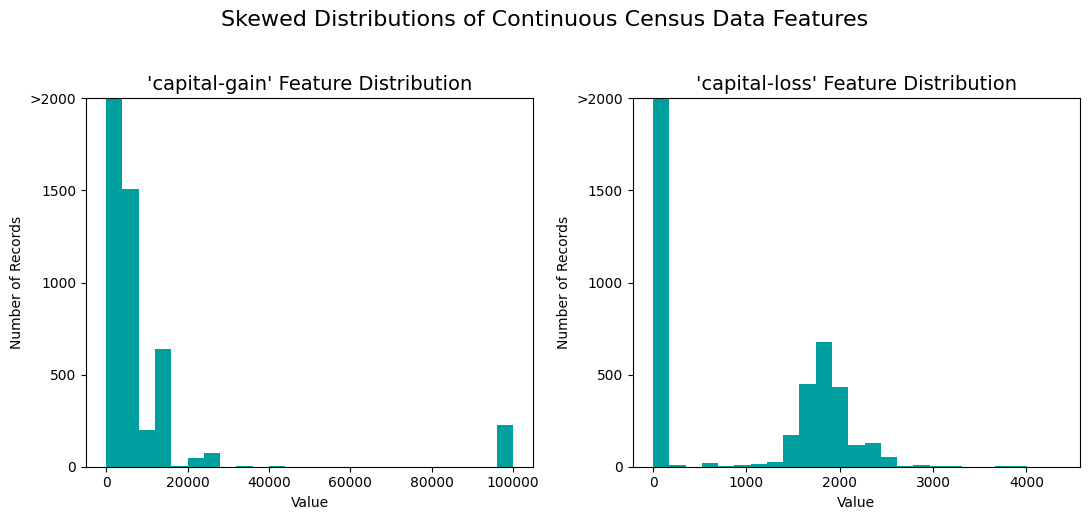

In [24]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

c:\Users\LENOVO\AMIT AI\Amit-1\myenv\Scripts\Machine learning\Mini_Project_2\P2\finding_donors\visuals.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


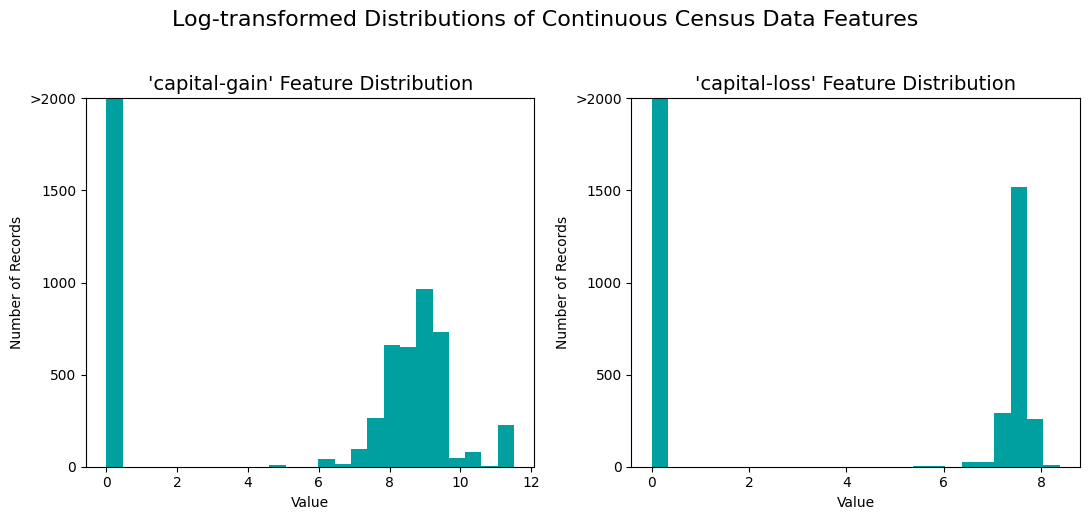

In [25]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [26]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() 
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5)) 

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [27]:

# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 0 if x == '<=50K' else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [28]:
# Import train_test_split
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, income, test_size = 0.2, random_state = 42 )

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


In [29]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case.
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

# True Positives (TP) = Number of >50K
TP = n_greater_50k

# False Positives (FP) = Number of <=50K (all are incorrectly predicted as >50K)
FP = n_at_most_50k

#  Calculate accuracy,
accuracy = TP / n_records 

# Precision = TP / (TP + FP)
precision = TP / TP + FP

# Recall = 1 (because FN = 0)
recall = 1.0

# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
fscore = 2 * (precision * recall) / (precision + recall)

#  Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)) 

Naive Predictor: [Accuracy score: 0.2478, F-score: 1.9999]


In [30]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    parameters :
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])  # Fit the learner to the sample size of training data
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
    # Get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions_test = learner.predict(X_test)  # Predictions on the test set
    predictions_train = learner.predict(X_train[:300])  # Predictions on the first 300 training samples
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


In [31]:
from sklearn.metrics import accuracy_score, fbeta_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])  # Train the learner with a subset of data
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)  # Predict on test set
    predictions_train = learner.predict(X_train[:300])  # Predict on first 300 training samples
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a simple dataset for demonstration purposes
x, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=LogisticRegression()

model=train_predict(clf, 100, X_train, y_train, X_test, y_test)
model 

LogisticRegression trained on 100 samples.


{'train_time': 0.0,
 'pred_time': 0.0,
 'acc_train': 0.85,
 'acc_test': 0.78,
 'f_train': np.float64(0.8597285067873304),
 'f_test': np.float64(0.8277404921700223)}

LogisticRegression trained on 8 samples.
LogisticRegression trained on 80 samples.
LogisticRegression trained on 800 samples.
SVC trained on 8 samples.
SVC trained on 80 samples.
SVC trained on 800 samples.
DecisionTreeClassifier trained on 8 samples.
DecisionTreeClassifier trained on 80 samples.
DecisionTreeClassifier trained on 800 samples.


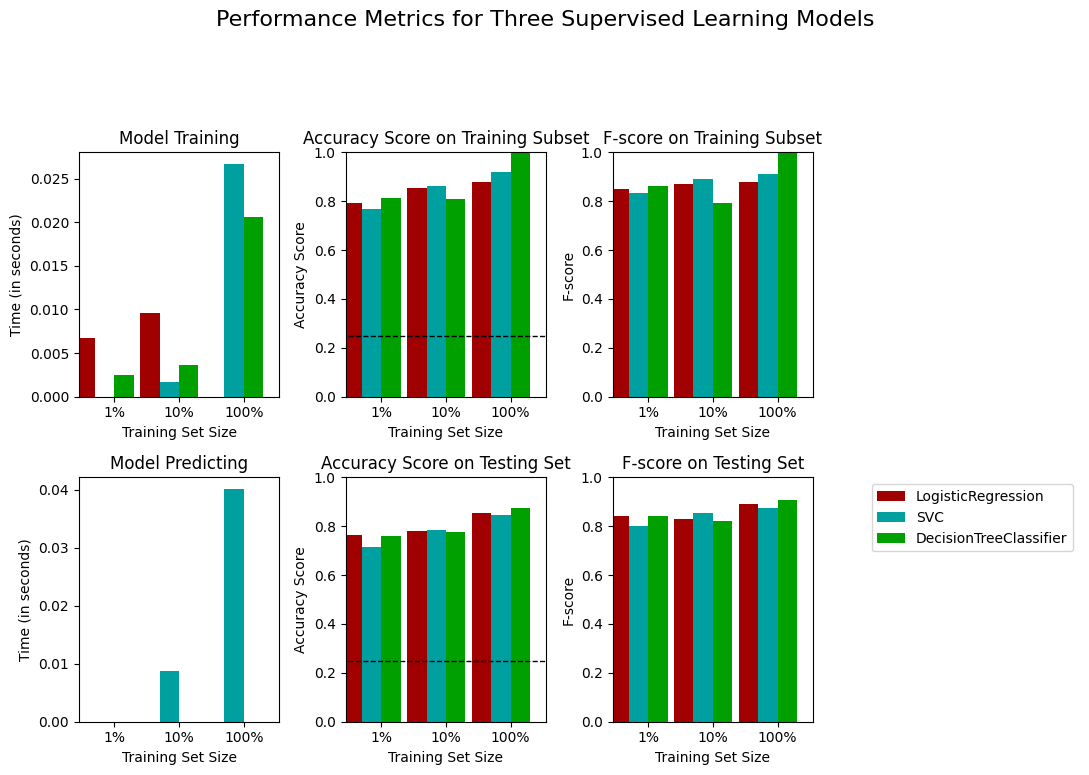

In [32]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

# Initialize the three models
clf_A = LogisticRegression(random_state=42, max_iter=500)  # Logistic Regression
clf_B = SVC(random_state=42)  # Support Vector Machine (SVM)
clf_C = DecisionTreeClassifier(random_state=42)  # Decision Tree Classifier

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)  # 100% of the training data
samples_10 = int(0.1 * samples_100)  # 10% of the training data
samples_1 = int(0.01 * samples_100)  # 1% of the training data

# Collect results on the learners 
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__  # Get the model's class name
    results[clf_name] = {}  # Initialize a dictionary for the classifier
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        # Train and predict with the current model and sample size
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
vs.evaluate(results, accuracy, fscore)

In [33]:
from sklearn.metrics import accuracy_score, fbeta_score

# Step 1: Fit the Logistic Regression model (clf_A)
clf_A.fit(X_train, y_train)

# Step 2: Predict the labels for the test set
y_pred = clf_A.predict(X_test)

# Step 3: Calculate accuracy and F-score
accuracy = accuracy_score(y_test, y_pred)
fscore = fbeta_score(y_test, y_pred, beta=0.5)

# Print the results
print("Accuracy of Logistic Regression:", accuracy)
print("F-Score of Logistic Regression:", fscore)


Accuracy of Logistic Regression: 0.855
F-Score of Logistic Regression: 0.8902691511387164


In [34]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
clf = LogisticRegression(random_state=42, max_iter=500)

# Corrected parameters to avoid incompatible combinations
parameters = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'l1_ratio': [0.5]}
]


# Make an fbeta_score scoring object using make_scorer()
# Use beta=0.5 for fbeta_score to emphasize precision
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the best model
best_predictions = best_clf.predict(X_test)

# Print the best parameters and evaluate the final model
print("Best Parameters Found:", grid_fit.best_params_)
print("Accuracy on Testing Set:", accuracy_score(y_test, best_predictions))
print("F-beta Score on Testing Set:", fbeta_score(y_test, best_predictions, beta=0.5))


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: C

Best Parameters Found: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Testing Set: 0.87
F-beta Score on Testing Set: 0.9034907597535934


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


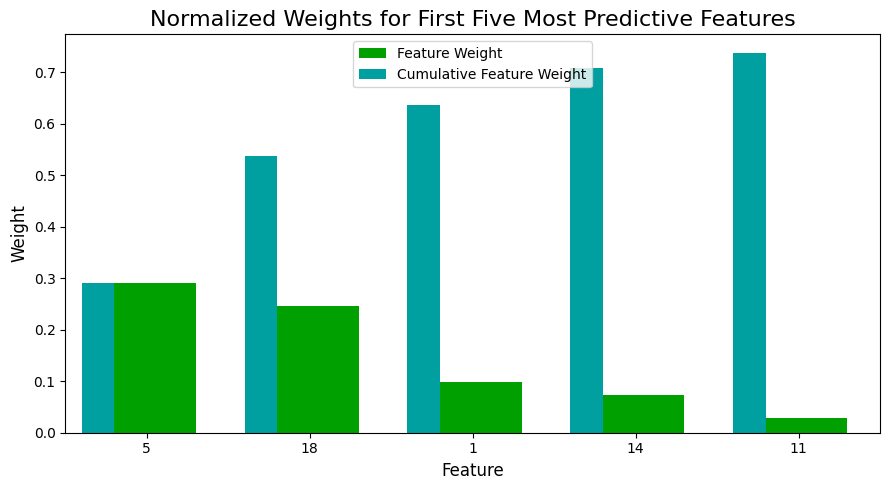

5: 0.2915
18: 0.2462
1: 0.0978
14: 0.0733
11: 0.0277


In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Convert X_train to DataFrame (if it's not already a DataFrame)
X_train_df = pd.DataFrame(X_train) 

# Train the model on the training set
model = RandomForestClassifier(random_state=0)
model.fit(X_train_df, y_train)

# Extract the feature importances
importances = model.feature_importances_

# Plot the feature importances
vs.feature_plot(importances, X_train_df, y_train)

# the top 5 most important features based on the feature importance scores returned by the model
# Identify top 5 features manually
import numpy as np
top_5_indices = np.argsort(importances)[::-1][:5]  # Sort and pick top 5
top_5_features = X_train_df.columns[top_5_indices]
top_5_importances = importances[top_5_indices]

# Display results
for feature, importance in zip(top_5_features, top_5_importances):
    print(f"{feature}: {importance:.4f}")

In [36]:
# Import functionality for cloning a model
from sklearn.base import clone
X_test_df = pd.DataFrame(X_test)
# Reduce the feature space
X_train_reduced = X_train_df[X_train_df.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test_df[X_test_df.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n--------------------------------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}\n----------------------------------".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n----------------------------------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
--------------------------------
Accuracy on testing data: 0.8700
F-score on testing data: 0.9035
----------------------------------

Final Model trained on reduced data
----------------------------------
Accuracy on testing data: 0.8600
F-score on testing data: 0.8977
